In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv('Breast_Cancer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [5]:
#Label encoding for categorical columns
categorical_cols = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [6]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [7]:
X = df.drop(['Status'], axis = 'columns')
y = df['Status']

In [8]:
#standardizing using StandardScalar
ss = StandardScaler()
X = ss.fit_transform(X)

In [9]:
X

array([[ 1.56525337,  0.39715987, -0.34910251, ...,  1.19067633,
        -0.61817175, -0.4929608 ],
       [-0.44322226,  0.39715987, -0.34910251, ..., -0.04409458,
         0.16480688, -0.40569537],
       [ 0.44943358,  0.39715987, -1.28938932, ..., -0.04409458,
         0.5562962 ,  0.16152997],
       ...,
       [ 1.56525337,  0.39715987, -0.34910251, ..., -0.41452585,
        -0.22668243, -0.10026634],
       [ 0.44943358, -3.14645727, -1.28938932, ..., -0.41452585,
        -0.61817175,  0.03063182],
       [-0.88955017,  0.39715987, -0.34910251, ..., -0.90843421,
        -0.42242709,  1.25234793]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression

In [11]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9031055900621118

##### Confusion Matrix for Logistic Regression model

In [12]:
y_pred_lr = lr.predict(X_test)
cmlr = confusion_matrix(y_test, y_pred_lr)
cmlr

array([[677,  22],
       [ 56,  50]], dtype=int64)

Text(42.0, 0.5, 'Truth')

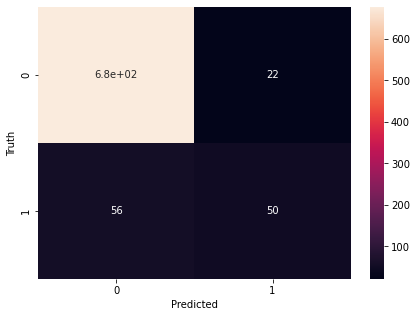

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(cmlr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print("R2_Score:",metrics.r2_score(y_test, y_pred_lr))

Accuracy: 0.9031055900621118
Mean Absolute Error: 0.0968944099378882
Mean Squared Error: 0.0968944099378882
Root Mean Squared Error: 0.3112786692625889
R2_Score: 0.1525629605636084


# SVM

In [15]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9006211180124224

##### Confusion Matrix for SVM model

In [16]:
y_pred_svm = svm.predict(X_test)
cms = confusion_matrix(y_test, y_pred_svm)
cms

array([[688,  11],
       [ 69,  37]], dtype=int64)

Text(42.0, 0.5, 'Truth')

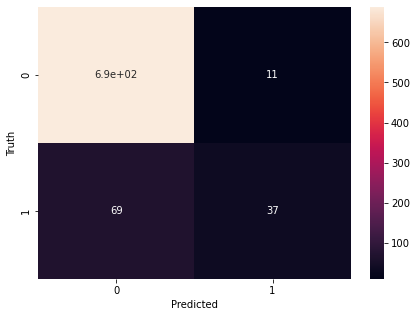

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(cms, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_svm))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_svm))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))
print("R2_Score:",metrics.r2_score(y_test, y_pred_svm))

Accuracy: 0.9006211180124224
Mean Absolute Error: 0.09937888198757763
Mean Squared Error: 0.09937888198757763
Root Mean Squared Error: 0.31524416249564025
R2_Score: 0.13083380570626502


# KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8906832298136645

##### Confusion Matrix for KNN model

In [20]:
y_pred_knn = knn.predict(X_test)
cmknn = confusion_matrix(y_test, y_pred_knn)
cmknn

array([[694,   5],
       [ 83,  23]], dtype=int64)

Text(42.0, 0.5, 'Truth')

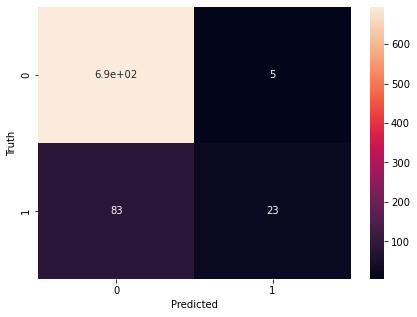

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(cmknn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print("R2_Score:",metrics.r2_score(y_test, y_pred_knn))

Accuracy: 0.8906832298136645
Mean Absolute Error: 0.1093167701863354
Mean Squared Error: 0.1093167701863354
Root Mean Squared Error: 0.3306308669594165
R2_Score: 0.04391718627689156


# Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9080745341614906

##### Confusion Matrix for Random Forest model -  considering all variables

In [24]:
y_pred_rf = rf.predict(X_test)
cmrf = confusion_matrix(y_test, y_pred_rf)
cmrf

array([[683,  16],
       [ 58,  48]], dtype=int64)

Text(42.0, 0.5, 'Truth')

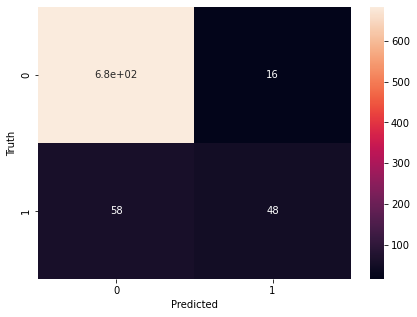

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(cmrf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("R2_Score:",metrics.r2_score(y_test, y_pred_rf))

Accuracy: 0.9080745341614906
Mean Absolute Error: 0.09192546583850932
Mean Squared Error: 0.09192546583850932
Root Mean Squared Error: 0.3031921269401785
R2_Score: 0.1960212702782952


The above 4 models gives the accuracy by considering all the variables in the dataset. But there are some variables like Race or Size of Tumor (The size of tumor can vary for different types of cancer and breast cancer tissues can still have impact even if they are small. Some tumors, even if the size is either bog or small, it is hard to differentiate they are benign or malignant), that are irrelevant for the diagnosis. So, from the given data, let us try to extract important features using feature_importances_ function in Random Forest Classifier method.

In [27]:
X_train_cols = ['Age','Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'Tumor Size', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

In [28]:
importance = pd.Series(rf.feature_importances_,index=X_train_cols).sort_values(ascending=False)
importance

Survival Months           0.371832
Age                       0.113638
Regional Node Examined    0.102966
A Stage                   0.101343
Reginol Node Positive     0.083635
Marital Status            0.040060
6th Stage                 0.030163
N Stage                   0.026167
Progesterone Status       0.024939
Grade                     0.023805
T Stage                   0.023398
Race                      0.020738
differentiate             0.017495
Estrogen Status           0.016084
Tumor Size                0.003737
dtype: float64

No handles with labels found to put in legend.


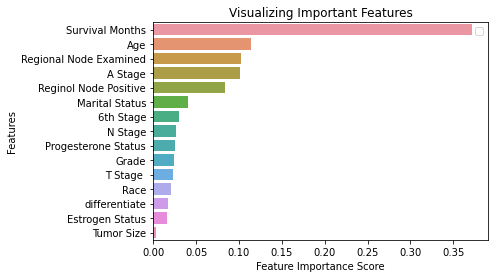

In [29]:
sns.barplot(x=importance, y=importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [30]:
X_train_scaled = df.drop(['Grade', 'Progesterone Status', 'Race', 'differentiate', 'Estrogen Status', 'Tumor Size'], axis = 'columns')
X_train_scaled_rf = ss.fit_transform(X_train_scaled)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled_rf, y, test_size=0.2, random_state=1)

In [32]:
rf = RandomForestClassifier(n_estimators=40,criterion='gini', bootstrap=True, max_depth = 4)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

We can see that, considering only the important features, with some penalties, is giving highest accuracy range to predict the living status of the patient.

##### Confusion Matrix for Random Forest model -  considering only top 10 the important features

In [33]:
y_pred_rf_imp = rf.predict(X_test)
cmrf_imp = confusion_matrix(y_test, y_pred_rf_imp)
cmrf_imp

array([[699,   0],
       [  0, 106]], dtype=int64)

Text(42.0, 0.5, 'Truth')

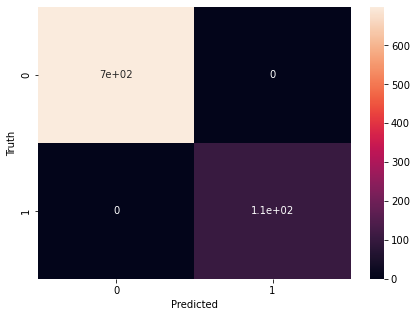

In [34]:
plt.figure(figsize=(7,5))
sns.heatmap(cmrf_imp, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_imp))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf_imp))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rf_imp))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_imp)))
print("R2_Score:",metrics.r2_score(y_test, y_pred_rf_imp))

Accuracy: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2_Score: 1.0
